# Apparent Temperature Prediction - Assignment Solution

In this notebook, we'll build a linear regression model to predict `Apparent Temperature` using an appropriate predictor variable.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning and preparation
- Model building
- Model evaluation


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

In [3]:
# Reading the dataset

weather_data = pd.read_csv("weather_data.csv")

In [4]:
# Let's take a look at the first few rows

weather_data.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.


Let's inspect the various aspects of our dataframe

In [5]:
weather_data.shape

(5999, 12)

In [6]:
# Summary of the dataset

weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [7]:
weather_data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

5999 rows, 12 columns, no null values


In [8]:
weather_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828
std,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000
50%,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000
75%,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000


The values in the 'Loud Cover' column have all the values as zero. This data does not explain anything. So, let us drop this column from the database. Also, the 'Daily Summary' column is not going to help us in doing any quantitative analysis. So, let's drop this table as well.

In [9]:
weather_data = weather_data.drop(columns=['Loud Cover'])
weather_data = weather_data.drop(columns=['Daily Summary'])
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [10]:
# Summary

weather_data['Summary'].astype('category').value_counts()

Partly Cloudy               1791
Mostly Cloudy               1473
Overcast                    1230
Clear                        853
Foggy                        576
Breezy and Overcast           25
Breezy and Mostly Cloudy      20
Breezy and Partly Cloudy       7
Breezy and Foggy               7
Humid and Mostly Cloudy        6
Windy and Overcast             4
Humid and Partly Cloudy        3
Windy and Partly Cloudy        2
Windy and Foggy                2
Name: Summary, dtype: int64

We can notice that Most of the times weather is Cloudy (Partly or Mostly)
<br>
Apart from that, we can see that the data is very imbalanced. Hence, It is not adviced to use this feature for training

In [11]:
# Precipitation is water released from clouds in the form of rain, freezing rain, sleet, snow, or hail.

# Here we have only two types: rain and snow

weather_data['Precip Type'].astype('category').value_counts()

rain    4762
snow    1237
Name: Precip Type, dtype: int64

So we can notice that type of Precipitation is mostly rain.
<br>
Going forward, we'll convert this variables to integer so that we can use it in our model training.

#### Visualising the Data

Let's now visualise our data using seaborn. 

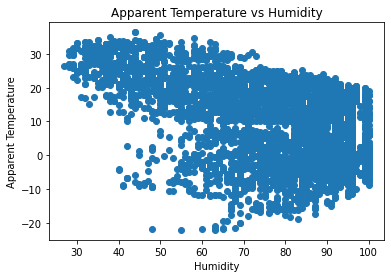

In [12]:
apparent_temp_df = pd.DataFrame(weather_data['Apparent Temperature (C)'])
humidity_df = pd.DataFrame(weather_data['Humidity'] * 100)

plt.scatter(humidity_df, apparent_temp_df)
plt.xlabel("Humidity")
plt.ylabel("Apparent Temperature")
plt.title("Apparent Temperature vs Humidity")
plt.show()

Here we can notice that for low humidity (<40), The apparent temperature is still high.
<br>
But, As the graph is very dense, we can tell that there is no certain relationship between Humidity and Apparent Temperature that can give us any insights.

So let's check the correlation for the same.

In [13]:
cor = weather_data.corr()
cor


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,0.044263,0.432098,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,0.055151,0.422888,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.041205,-0.343168,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.068218,0.078624,-0.043172
Wind Bearing (degrees),0.044263,0.055151,0.041205,-0.068218,1.000000,0.016963,-0.052019
Visibility (km),0.432098,0.422888,-0.343168,0.078624,0.016963,1.000000,-0.038036
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,-0.052019,-0.038036,1.000000


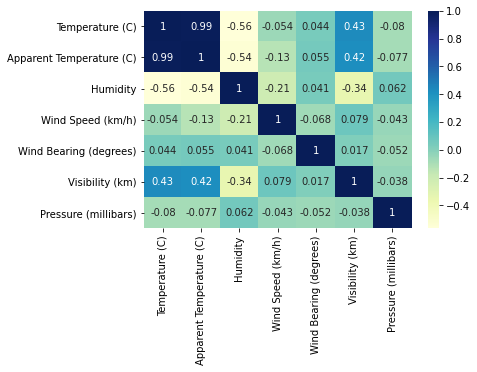

In [14]:
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

- The correlation plot above suggests a negative moderate correlation between apparent temperature and humidity. 
<br>
- However, the correlation between temperature and humidity is stronger as compared to the correlation between apparent temperature and humidity.
<br>
- This is because we know that humidity is directly affected by temperature value.
<br>
- Apart from this, we do not see any high correlation between any two independent variables which suggests that there is no multicolinearity.
<br>
- In case, if two independent variables are highly correlated to each other, we need to drop one of them which is least correlated with the dependent variable.

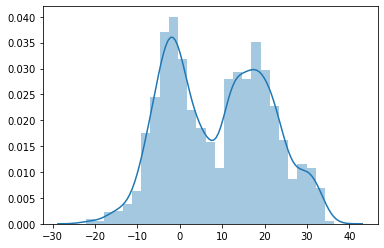

In [15]:
sns.distplot(apparent_temp_df )
plt.show()

Here, We can notice that there are two peaks which suggests that the distribution is not normal.
<br>
We have two peaks for apparent temperature value ranging from (-10,0) and (10,30)

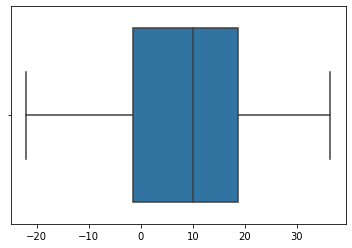

In [16]:
sns.boxplot(apparent_temp_df)
plt.show()

We can see that the distribution is not skewed and also does not have any outlier values

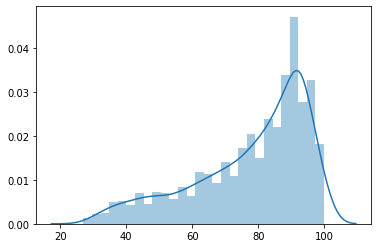

In [17]:
sns.distplot(humidity_df)
plt.show()

The distribution is higly skewed towards left which can be due to presence of outliers.
<br>
We can confirm this by plotting a box plot.

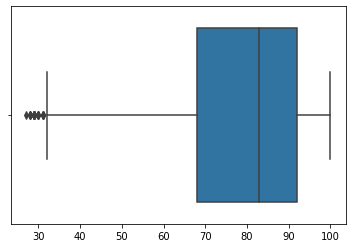

In [18]:
sns.boxplot(humidity_df)
plt.show()

Here also, we can see that the distribution is skewed towards left and there are some outliers.

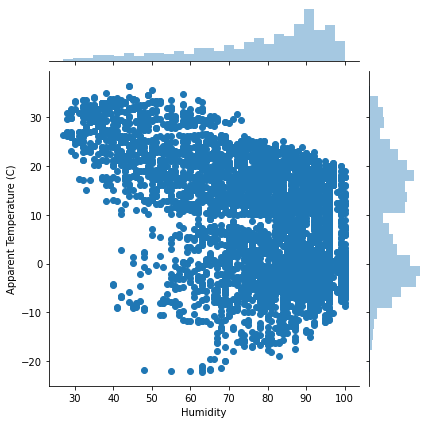

In [19]:
sns.jointplot(weather_data['Humidity'] * 100, weather_data['Apparent Temperature (C)'])
plt.show()

The jointplot between apparent temperature and humidity suggests a moderate negative correlation between them. This correlation was also confirmed by the correlation table drafted earlier.

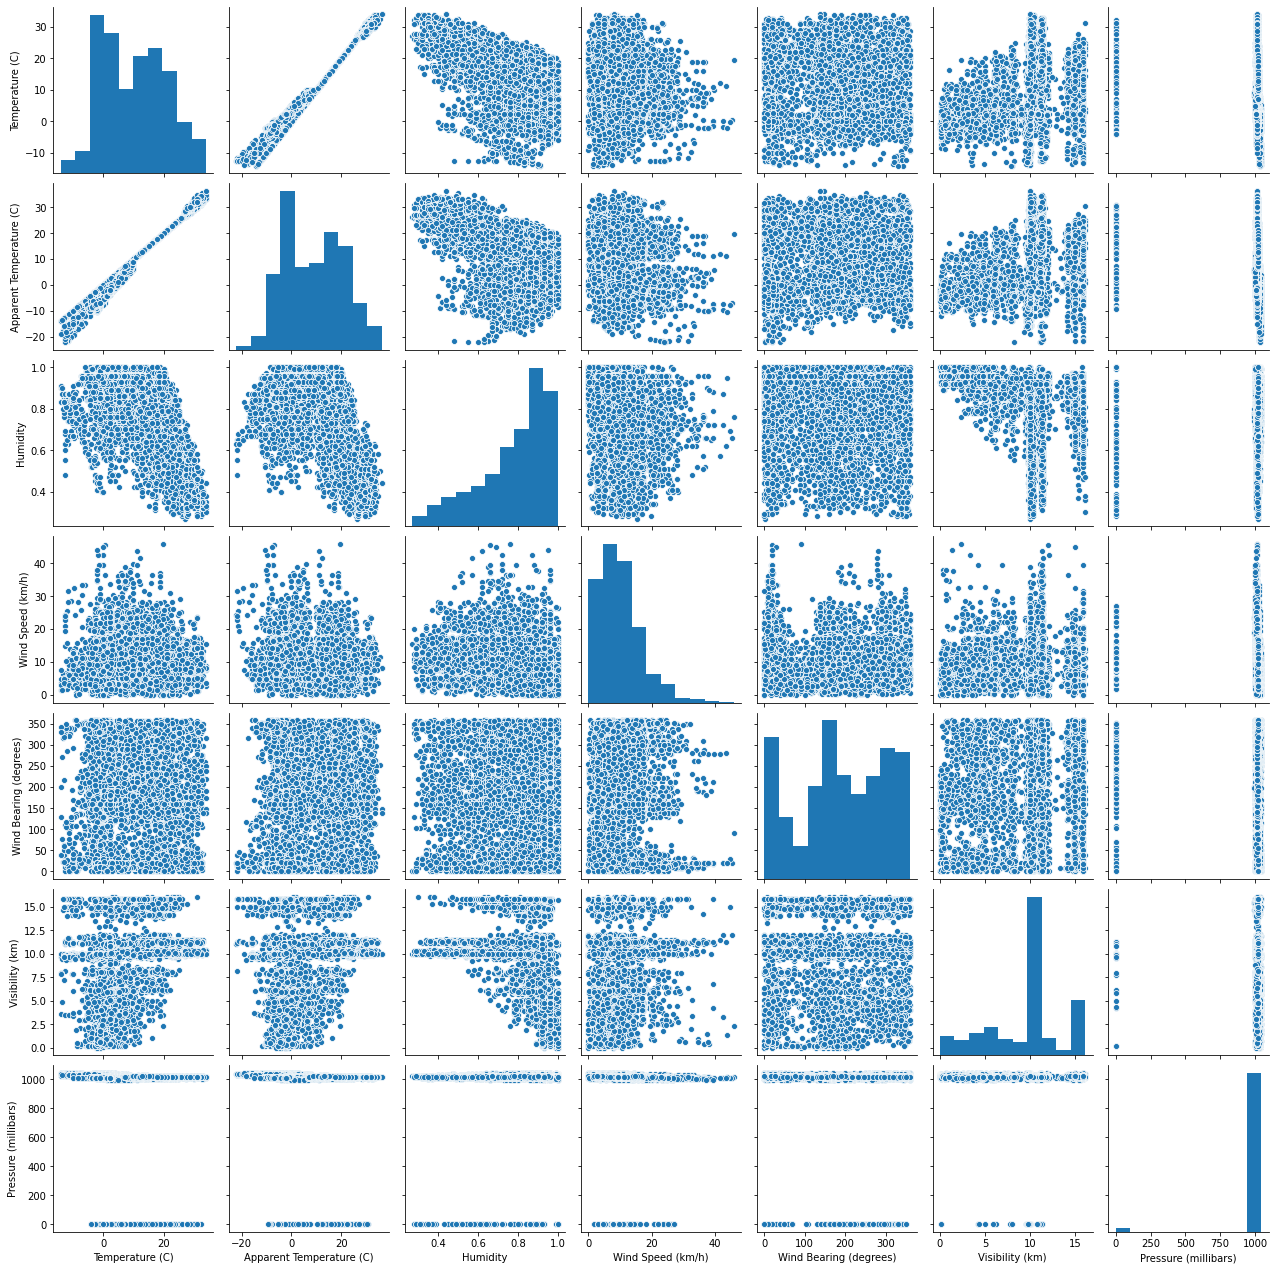

In [20]:
# Let's now make pairwise plot to see for a trend.
sns.pairplot(weather_data)
plt.show()

From the graphs above, you can see that in most of the cases, the data points are widely scatter all over the place. Thus, there is no clear definite trend. Also, the relationship between pressure and other parameters is somewhat uniform.

Also, when there is low visibility, the humidity is high and when there is high visibility, the humidity is low.

In [21]:
weather_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...,...
5994,2006-05-15 19:00:00.000 +0200,Partly Cloudy,rain,19.094444,19.094444,0.60,6.9391,350,11.2056,1020.07
5995,2006-05-15 20:00:00.000 +0200,Partly Cloudy,rain,17.655556,17.655556,0.62,1.6100,56,10.3523,1020.44
5996,2006-05-15 21:00:00.000 +0200,Partly Cloudy,rain,15.072222,15.072222,0.78,1.9481,170,9.9820,1020.99
5997,2006-05-15 22:00:00.000 +0200,Partly Cloudy,rain,13.405556,13.405556,0.83,3.1073,201,15.8263,1021.50


## Data cleaning and preparation

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset.

We saw some outliers in Humidity. Lets check the percentage of outlier values and handle accordingly

From the boxplot, we have noticed that the outliers are on the right side i.e. values lesser than Q1-1.5*IQR.
<br>
We'll use the Inter Quantile Range to find out the outliers.

In [22]:
Q1 = weather_data.Humidity.quantile(0.25)
Q3 = weather_data.Humidity.quantile(0.75)

## Finding IQR
IQR = Q3 - Q1

## Finding lower boundary for thresholding outlier values
lower_boundary = Q1 - 1.5 * IQR

## Printing some outlier values
humidity_outliers = weather_data.Humidity[weather_data.Humidity < lower_boundary]

In [23]:
## Checking the percentage of outlier values

(len(humidity_outliers)/len(weather_data)) * 100

0.9334889148191364

As the % of outlier values is less than 1%, we can easily drop them

In [24]:
weather_data = weather_data[weather_data.Humidity > lower_boundary]

Now we'll check the distribution and also draw a boxplot to verify the same.

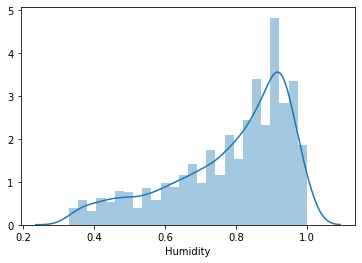

In [25]:
sns.distplot(weather_data.Humidity)
plt.show()

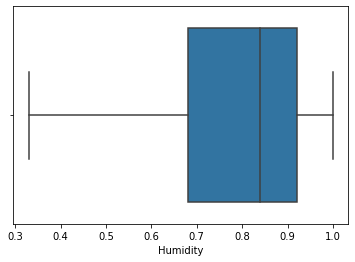

In [26]:
sns.boxplot(weather_data.Humidity)
plt.show()

Though the distribution is still skewed, We can see that all the outlier values have been removed.

Now, we'll create dummy variables for `precip type` to convert it to integer

In [27]:
weather_data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [28]:
# Convert into dummies
weather_data['Precip Type'] = pd.get_dummies(weather_data['Precip Type'], drop_first=True)
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


### Feature Engineering

- Creating new column from existing one's which can be useful for model training

Let's check the `temperature` values.

In [29]:
weather_data.describe()["Temperature (C)"]

count    5943.000000
mean       10.051498
std        10.467074
min       -14.088889
25%         1.083333
50%         9.977778
75%        18.183333
max        34.005556
Name: Temperature (C), dtype: float64

We can divide the Temperature values into 3 different bins, namely: `low`, `medium`, `high`
<br>
We'll use the quantile values to create this bins

In [30]:
# Fetching the 3 quantiles
Q1 = weather_data["Temperature (C)"].quantile(0.25)
Q2 = weather_data["Temperature (C)"].quantile(0.5)
Q3 = weather_data["Temperature (C)"].quantile(0.75)

# Creating a function to convert continous temperature values into 3 bins

def convert_temp(x):
    if x <= Q1:
        return 'low'
    elif (x > Q1) and (x < Q3):
        return 'medium'
    else:
        return 'high'
    

In [31]:
# Applying the function
weather_data['Temperature_Bins'] = weather_data["Temperature (C)"].apply(convert_temp)

In [32]:
# Convert into dummies
dummies = pd.get_dummies(weather_data['Temperature_Bins'], drop_first=True)
dummies.head()

,low,medium
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [33]:
# Merging dummy variables in dataset
weather_data = pd.concat([weather_data,dummies], axis=1)

In [34]:
# Dropping all unnecesarry columns from our Analysis

weather_data.drop(['Formatted Date','Summary','Temperature_Bins'],axis=1, inplace=True)

As we have created a derived feature here, i.e. created new features from existing column, It is necessary to check the correlation between those features as there will be higher chances that both old features and new derived features can be highly correlated with each other. 
<br>
If they are highly correlated, then we need to drop the old feature and only keep the new one.

In [35]:
weather_data[['Temperature (C)', 'low', 'medium', 'Apparent Temperature (C)']].corr()

,Temperature (C),low,medium,Apparent Temperature (C)
Temperature (C),1.000000,-0.700055,-0.054033,0.992809
low,-0.700055,1.000000,-0.577576,-0.696956
medium,-0.054033,-0.577576,1.000000,-0.040222
Apparent Temperature (C),0.992809,-0.696956,-0.040222,1.000000


Here, we can notice that the correlation between `low` (derived feature) & `Temperature (C)` is higher.
<br>
In general scenario we would remove the `Temperature (C)` variable but here you can see that this column is very highly correlated with our dependent variable hence by removing it we may loose an important feature from our model. So, we'll keep this variable (for this particular case).

### Scaling

Now we need to scale the variables for better interpretability.
<br>
As all the final independent variables in our dataset are numeric, we'll scale all the variables
<br>
Let's scale all these columns using StandardScaler. 
You can use any other scaling method as well; it is totally up to you. 


In [36]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

X = weather_data.drop('Apparent Temperature (C)',1)
X[X.columns] = scaler.fit_transform(X)

In [37]:
y = weather_data['Apparent Temperature (C)']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [38]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

---
### Building the first Linear Regression model with all the features

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times Humidity$

The $m$ values are called the model **coefficients** or **model parameters**.

---

In [39]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
lm.score(X_train, y_train)

0.9919920926211808

So we can notice that our model is currently 99.1% accurate. Now, let's remove the `Temperature (C)` column which is most correlated with y and check whether it affects the model's performance or not.

In [41]:

# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train.drop('Temperature (C)', 1), y_train)

LinearRegression()

In [42]:
lm.score(X_train.drop('Temperature (C)', 1) ,y_train)

0.8246675089864143

So here it is. As soon as we remove the most correlated feature, our accuracy goes down in a giffy from 99.2% to 82.4%.
<br>
Hence it is neccesarry to keep all independent columns which are highly correlated with the dependent column.    

#### Model Building Using RFE

Now, you have close to 9 features. It is not adviced to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. 

We'll first start off by finding out the optimal number of features using RFECV, and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [43]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=lm, step=1, cv=3)
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 9


In [44]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 18 features
lm = LinearRegression()
rfe1 = RFE(lm, 9)

# Fit with 18 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


In [45]:
X_train

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),low,medium
2895,-0.512695,-0.296335,-0.262349,2.683983,-0.479441,0.428052,0.085049,-0.578451,1.001516
2892,-0.512695,-0.491142,-0.083316,1.745448,-0.385812,0.428052,0.097062,-0.578451,1.001516
919,-0.512695,0.727597,0.334428,0.150923,-0.554344,0.126355,0.101699,-0.578451,1.001516
883,-0.512695,1.319449,-1.455903,-1.055413,0.522386,0.428052,0.115890,-0.578451,-0.998487
5193,1.950478,-1.168455,1.050560,4.062301,-1.593623,-2.247531,0.118138,1.728754,-0.998487
...,...,...,...,...,...,...,...,...,...
1893,-0.512695,-0.664717,0.811849,-0.148819,0.719006,-0.826375,0.248036,-0.578451,1.001516
350,-0.512695,0.948944,-1.515580,-1.340413,-1.106754,0.412174,0.127973,-0.578451,-0.998487
79,-0.512695,-0.380734,0.871527,2.742948,1.477399,-0.770799,0.040578,-0.578451,1.001516
3965,-0.512695,0.995125,0.394106,-0.544379,-0.282821,1.424449,0.141321,-0.578451,-0.998487


### Building a Linear Model using statsmodels

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [46]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 18 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),low,medium
2895,1.0,-0.512695,-0.296335,-0.262349,2.683983,-0.479441,0.428052,0.085049,-0.578451,1.001516
2892,1.0,-0.512695,-0.491142,-0.083316,1.745448,-0.385812,0.428052,0.097062,-0.578451,1.001516
919,1.0,-0.512695,0.727597,0.334428,0.150923,-0.554344,0.126355,0.101699,-0.578451,1.001516
883,1.0,-0.512695,1.319449,-1.455903,-1.055413,0.522386,0.428052,0.115890,-0.578451,-0.998487
5193,1.0,1.950478,-1.168455,1.050560,4.062301,-1.593623,-2.247531,0.118138,1.728754,-0.998487


In [47]:
X_train_rfe1.shape

(4160, 10)

In [48]:
# Fitting the model with 18 variables

lm1 = sm.OLS(y_train, X_train_rfe1).fit()   

# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.992
Model:                                  OLS   Adj. R-squared:                  0.992
Method:                       Least Squares   F-statistic:                 5.712e+04
Date:                      Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                              17:56:42   Log-Likelihood:                -6168.2
No. Observations:                      4160   AIC:                         1.236e+04
Df Residuals:                          4150   BIC:                         1.242e+04
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

####  Looking at some key statistics from the summary

The values we are concerned with are - 

1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficients should have very low p value (<0.05)
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.992
Meaning that 99.2% of the variance in `Apparent Temperature` is explained by these variables

This is a very good R-squared value.

##### 3. F statistic should have a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.## New markdown cell

Hence, The model seems to be doing a good job. 
<br>
Let's also quickly take a look at the VIF values.

In [49]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,low,10.19
2,Temperature (C),6.23
1,Precip Type,4.79
9,medium,4.12
3,Humidity,1.82
6,Visibility (km),1.33
4,Wind Speed (km/h),1.16
5,Wind Bearing (degrees),1.02
7,Pressure (millibars),1.02
0,const,1.00


Notice that the highest value VIF is 10.19 which is greater than the optimal cut-off of 5. These variables isn't of use. Hence we'll drop this column and rebuild our model.

In [50]:
# Dropping "low"
X_train_rfe1.drop("low",1,inplace=True)

In [51]:
# Fitting the model with 18 variables

lm1 = sm.OLS(y_train, X_train_rfe1).fit()   

# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.992
Model:                                  OLS   Adj. R-squared:                  0.992
Method:                       Least Squares   F-statistic:                 6.346e+04
Date:                      Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                              17:56:43   Log-Likelihood:                -6194.7
No. Observations:                      4160   AIC:                         1.241e+04
Df Residuals:                          4151   BIC:                         1.246e+04
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Precip Type,3.69
2,Temperature (C),3.64
8,medium,2.21
3,Humidity,1.82
6,Visibility (km),1.33
4,Wind Speed (km/h),1.16
5,Wind Bearing (degrees),1.02
7,Pressure (millibars),1.02
0,const,1.00


The large VIFs have now dropped to a workable value. But from the p-value perspective, `Humidity` has become insignificant. So let's drop that.

In [53]:
X_train_rfe1.drop('Humidity', axis = 1, inplace = True)

In [54]:
# Fitting the model with 18 variables

lm1 = sm.OLS(y_train, X_train_rfe1).fit()   

# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.992
Model:                                  OLS   Adj. R-squared:                  0.992
Method:                       Least Squares   F-statistic:                 7.252e+04
Date:                      Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                              17:56:43   Log-Likelihood:                -6195.2
No. Observations:                      4160   AIC:                         1.241e+04
Df Residuals:                          4152   BIC:                         1.246e+04
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

We can still see that the `Visibility (km)` column has a higher p-values. Let's drop that variable and retrain our model

In [55]:
X_train_rfe1.drop('Visibility (km)', axis = 1, inplace = True)

In [56]:
# Fitting the model with 18 variables

lm1 = sm.OLS(y_train, X_train_rfe1).fit()   

# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.992
Model:                                  OLS   Adj. R-squared:                  0.992
Method:                       Least Squares   F-statistic:                 8.458e+04
Date:                      Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                              17:56:44   Log-Likelihood:                -6196.5
No. Observations:                      4160   AIC:                         1.241e+04
Df Residuals:                          4153   BIC:                         1.245e+04
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

Again we can notice that the `Pressure (millibars)` column has a higher p-value. We need to drop that too## New markdown cell

In [57]:
X_train_rfe1.drop('Pressure (millibars)', axis = 1, inplace = True)

In [58]:
# Fitting the model with 18 variables

lm1 = sm.OLS(y_train, X_train_rfe1).fit()   

# Performing a summary operation lists out all the different parameters of the regression line fitted

print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.992
Model:                                  OLS   Adj. R-squared:                  0.992
Method:                       Least Squares   F-statistic:                 1.014e+05
Date:                      Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                              17:56:44   Log-Likelihood:                -6197.8
No. Observations:                      4160   AIC:                         1.241e+04
Df Residuals:                          4154   BIC:                         1.245e+04
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

All the VIF values and p-values seem to be in a good range. Also the `Adjusted R-squared` value has not dropped from `0.992` with **9 variables** to **5 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

## Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
y_train_pred = lm1.predict(X_train_rfe1)
res = (y_train - y_train_pred)

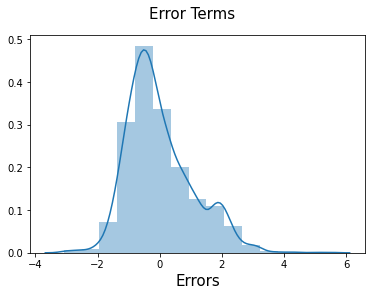

In [60]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)         # X-label
plt.show()

The residuals are following a somewhat normally distributed pattern with a mean negative mean. This seems okay.

## Model Evaluation

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [61]:
# Let's check the list of variables selected for the model training
X_train_rfe1.columns

Index(['const', 'Precip Type', 'Temperature (C)', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'medium'],
      dtype='object')

In [62]:
# Add a constant to the test set created
X_test = sm.add_constant(X_test)

# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe1 = X_test[X_train_rfe1.columns]

In [63]:
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1783 entries, 3556 to 1160
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   1783 non-null   float64
 1   Precip Type             1783 non-null   float64
 2   Temperature (C)         1783 non-null   float64
 3   Wind Speed (km/h)       1783 non-null   float64
 4   Wind Bearing (degrees)  1783 non-null   float64
 5   medium                  1783 non-null   float64
dtypes: float64(6)
memory usage: 97.5 KB


In [64]:
# Predict the y values corresponding to X_test_sm
y_pred = lm1.predict(X_test_rfe1)

In [65]:
y_pred.head()

3556    -0.148457
4601    29.111014
969     26.237961
3496     0.002966
5259    -1.979653
dtype: float64

Text(0, 0.5, 'y_pred')

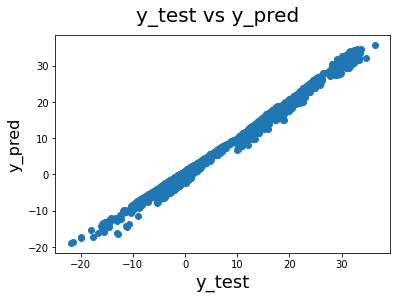

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

##### Looking at the RMSE

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [68]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1.0583556258931544

###### Checking the R-squared on the test set

In [69]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9917706715229537

Thus, for the model with 5 variables, the r-squared on training and test data is about 99.2% and 99.1% respectively. The adjusted r-squared on the train set is about is about 99.2%.

#### Checking the correlations between the final predictor variables

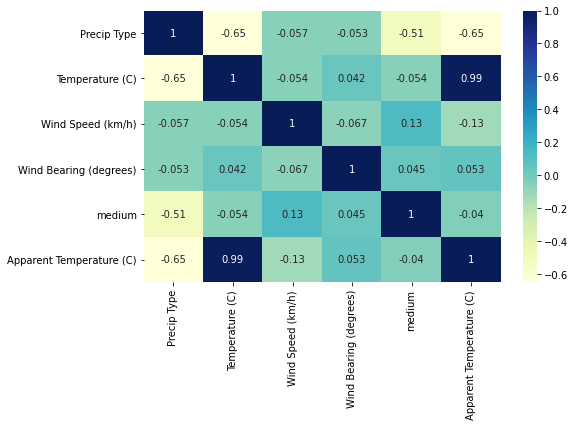

In [70]:
# Figure size
plt.figure(figsize=(8,5))

cols = ['Precip Type', 'Temperature (C)', 'Wind Speed (km/h)','Wind Bearing (degrees)', 
        'medium', 'Apparent Temperature (C)']
# Heatmap
sns.heatmap(weather_data[cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

The final predictors seem to have low correlations.